In [1]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Definir columnas de S-PLUS a incluir
colum_splus = [
    "ID", "RA", "DEC", 
    "u_PStotal", "J0378_PStotal", "J0395_PStotal", "J0410_PStotal", "J0430_PStotal",
    "g_PStotal", "J0515_PStotal", "r_PStotal", "J0660_PStotal", "i_PStotal",
    "J0861_PStotal", "z_PStotal",  
    "e_u_PStotal", "e_J0378_PStotal", "e_J0395_PStotal", "e_J0410_PStotal", "e_J0430_PStotal",
    "e_g_PStotal", "e_J0515_PStotal", "e_r_PStotal", "e_J0660_PStotal", "e_i_PStotal",
    "e_J0861_PStotal", "e_z_PStotal"
]

# Columnas de WISE a incluir
colum_wise = ["W1mag", "W2mag", "e_W1mag", "e_W2mag"]
colum_simbad = ["main_type"]


In [3]:
# Leer los archivos
df_splus = pd.read_csv("../Ha-emitters/Halpha_Mine_PerField_total-unique.csv", usecols=colum_splus)
df_wise = pd.read_csv("../Ha-emitters/Halpha_Mine_PerField_total-unique_wise.csv", usecols=["RA", "DEC"] + colum_wise)
df_simbad = pd.read_csv("../Ha-emitters/Halpha_Mine_PerField_total-unique_simbad.csv", usecols=["RA", "DEC"] + colum_simbad)

In [4]:
print("Number of object SPLUS:", len(df_splus))
print("Number of object SPLUS + WISE:", len(df_wise))
print("Number of object Simbad:", len(df_simbad))

Number of object SPLUS: 3637
Number of object SPLUS + WISE: 3173
Number of object Simbad: 731


In [5]:
for columns in df_splus.columns:
    print(columns)

ID
RA
DEC
r_PStotal
e_r_PStotal
g_PStotal
e_g_PStotal
i_PStotal
e_i_PStotal
u_PStotal
e_u_PStotal
z_PStotal
e_z_PStotal
J0378_PStotal
e_J0378_PStotal
J0395_PStotal
e_J0395_PStotal
J0410_PStotal
e_J0410_PStotal
J0430_PStotal
e_J0430_PStotal
J0515_PStotal
e_J0515_PStotal
J0660_PStotal
e_J0660_PStotal
J0861_PStotal
e_J0861_PStotal


In [6]:
for columns in df_wise.columns:
    print(columns)

RA
DEC
W1mag
W2mag
e_W1mag
e_W2mag


In [7]:
# Combinar los datos por RA y DEC (left join)
merged_df = pd.merge(
    df_splus,
    df_wise, 
    on=["RA", "DEC"],
    how="left"
)

In [8]:
# Rellenar valores faltantes de WISE con -99.0
merged_df[colum_wise] = merged_df[colum_wise].fillna(-99.0)

# Añadir columna de flag para WISE (opcional)
#merged_df["WISE_Flag"] = (merged_df["W1mag"] != -99.0).astype(int)

In [9]:
print("¡Catálogo listo para CDS!")
print(f"Número de objetos: {len(merged_df)}")  # Debe ser 3637
print(f"Columnas incluidas: {merged_df.columns.tolist()}")

¡Catálogo listo para CDS!
Número de objetos: 3637
Columnas incluidas: ['ID', 'RA', 'DEC', 'r_PStotal', 'e_r_PStotal', 'g_PStotal', 'e_g_PStotal', 'i_PStotal', 'e_i_PStotal', 'u_PStotal', 'e_u_PStotal', 'z_PStotal', 'e_z_PStotal', 'J0378_PStotal', 'e_J0378_PStotal', 'J0395_PStotal', 'e_J0395_PStotal', 'J0410_PStotal', 'e_J0410_PStotal', 'J0430_PStotal', 'e_J0430_PStotal', 'J0515_PStotal', 'e_J0515_PStotal', 'J0660_PStotal', 'e_J0660_PStotal', 'J0861_PStotal', 'e_J0861_PStotal', 'W1mag', 'W2mag', 'e_W1mag', 'e_W2mag']


In [10]:
merged_df.head()

,ID,RA,DEC,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,...,J0515_PStotal,e_J0515_PStotal,J0660_PStotal,e_J0660_PStotal,J0861_PStotal,e_J0861_PStotal,W1mag,W2mag,e_W1mag,e_W2mag
0,b'iDR4_3_HYDRA-0011_0001534',151.228065,-24.565881,15.220734,0.002704,16.171457,0.004697,14.812934,0.002310,18.507275,...,15.688791,0.007189,14.816056,0.003442,14.486720,0.004256,12.721,12.724,0.025,0.026
1,b'iDR4_3_HYDRA-0021_0019499',151.820602,-25.619486,13.060103,0.000955,13.233669,0.001089,13.076601,0.001002,14.610666,...,13.034685,0.002005,12.990587,0.001085,12.979302,0.001611,11.982,12.008,0.023,0.023
2,b'iDR4_3_HYDRA-0023_0021195',154.612704,-25.530006,14.198063,0.001602,14.808924,0.002449,14.000414,0.001494,16.387249,...,14.653158,0.004443,14.003431,0.001704,13.810323,0.002374,12.399,12.400,0.023,0.023
3,b'iDR4_3_HYDRA-0026_0046098',158.459389,-24.620632,14.722768,0.002233,15.341463,0.003469,14.474484,0.002015,17.200853,...,15.205017,0.006255,14.518179,0.002341,14.313604,0.003088,12.834,12.822,0.025,0.028
4,b'iDR4_3_HYDRA-0031_0032774',150.917736,-26.667847,15.091292,0.004283,15.484464,0.005422,15.128340,0.002657,16.868654,...,15.084617,0.007134,15.035774,0.004833,15.058778,0.004492,13.721,13.789,0.025,0.033


In [11]:
# Combinar los datos por RA y DEC (left join)
merged_df_ = pd.merge(
    merged_df,
    df_simbad, 
    on=["RA", "DEC"],
    how="left"
)

In [12]:
# ======================================================
# Funciones para cargar datos (modificadas)
# ======================================================
def open_csv_conc(pattern, exclude_pattern=None):
    """Carga CSVs, renombra PC1/PC2 a UMAP1/UMAP2, y añade grupos."""
    csv_files = glob.glob(pattern)
    if exclude_pattern:
        csv_files = [f for f in csv_files if exclude_pattern not in f]
    
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        
        # Renombrar componentes UMAP
        df = df.rename(columns={
            "PC1": "UMAP1", 
            "PC2": "UMAP2"
        })
        
        # Determinar grupo
        if "noise" in file:
            group = -1  # Ruido
        else:
            group = int(file.split("group")[-1].split(".")[0])
        
        df["ML_Group"] = group
        dfs.append(df)
    
    return pd.concat(dfs, ignore_index=True)

In [13]:
## Experimento 1: SPLUS (UMAP1/UMAP2 + grupos)
df_ml_splus = open_csv_conc(
    "../Class_main_unique/Halpha_emitter_group*.csv",
    exclude_pattern="simbad"
).rename(columns={
    "ML_Group": "ML_Group_SPLUS",
    "UMAP1": "UMAP1_SPLUS",  # Sufijo para experimento
    "UMAP2": "UMAP2_SPLUS"
})

In [14]:
len(df_ml_splus)

2181

In [15]:
# Experimento 2: SPLUS+WISE (UMAP1/UMAP2 + grupos)
df_ml_wise = open_csv_conc(
    "../Class_wise_main_unique/Halpha_emitter*.csv",
    exclude_pattern="simbad"
).rename(columns={
    "ML_Group": "ML_Group_SPLUS_WISE",
    "UMAP1": "UMAP1_SPWISE",  # Sufijo para experimento
    "UMAP2": "UMAP2_SPWISE"
})

In [16]:
len(df_ml_wise)

1910

In [17]:
# ======================================================
# Paso 2: Combinar todo con el catálogo base
# ======================================================
# Combinar UMAP y grupos
df_final = (
    merged_df_
    .merge(
        df_ml_splus[["ID", "RA", "DEC", "ML_Group_SPLUS", "UMAP1_SPLUS", "UMAP2_SPLUS"]], 
        on=["ID", "RA", "DEC"], 
        how="left"
    )
    .merge(
        df_ml_wise[["ID", "RA", "DEC", "ML_Group_SPLUS_WISE", "UMAP1_SPWISE", "UMAP2_SPWISE"]], 
        on=["ID", "RA", "DEC"], 
        how="left"
    )
)


In [18]:
df_final["ID"] = df_final["ID"].str[2:-1]
df_final

,ID,RA,DEC,r_PStotal,e_r_PStotal,g_PStotal,e_g_PStotal,i_PStotal,e_i_PStotal,u_PStotal,...,W2mag,e_W1mag,e_W2mag,main_type,ML_Group_SPLUS,UMAP1_SPLUS,UMAP2_SPLUS,ML_Group_SPLUS_WISE,UMAP1_SPWISE,UMAP2_SPWISE
0,iDR4_3_HYDRA-0011_0001534,151.228065,-24.565881,15.220734,0.002704,16.171457,0.004697,14.812934,0.002310,18.507275,...,12.724,0.025,0.026,EB*,2.0,-5.442610,7.757478,0.0,12.202629,2.276409
1,iDR4_3_HYDRA-0021_0019499,151.820602,-25.619486,13.060103,0.000955,13.233669,0.001089,13.076601,0.001002,14.610666,...,12.008,0.023,0.023,EB*,1.0,-2.864902,15.890389,0.0,7.046351,8.736568
2,iDR4_3_HYDRA-0023_0021195,154.612704,-25.530006,14.198063,0.001602,14.808924,0.002449,14.000414,0.001494,16.387249,...,12.400,0.023,0.023,EB*_Candidate,2.0,-6.490024,10.687394,0.0,11.147096,4.682925
3,iDR4_3_HYDRA-0026_0046098,158.459389,-24.620632,14.722768,0.002233,15.341463,0.003469,14.474484,0.002015,17.200853,...,12.822,0.025,0.028,EB*,2.0,-6.868538,9.669092,0.0,12.216504,4.232417
4,iDR4_3_HYDRA-0031_0032774,150.917736,-26.667847,15.091292,0.004283,15.484464,0.005422,15.128340,0.002657,16.868654,...,13.789,0.025,0.033,NaN,2.0,-4.440413,15.294579,0.0,8.234937,8.145382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,iDR4_3_STRIPE82-0157_0016873,349.808612,-0.962720,19.299433,0.020084,20.671846,0.058201,18.712898,0.016295,23.211632,...,16.220,0.068,0.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3633,iDR4_3_STRIPE82-0158_0009177,350.254869,0.323001,19.226210,0.027598,19.564507,0.033488,19.093145,0.031653,19.933153,...,13.822,0.041,0.039,QSO,4.0,12.468115,4.402364,4.0,-0.326460,8.711914
3634,iDR4_3_STRIPE82-0162_0018498,352.418578,0.670626,18.970238,0.025386,20.329790,0.087422,18.265017,0.020378,21.753021,...,15.443,0.047,0.127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3635,iDR4_3_STRIPE82-0163_0014886,354.578466,-0.927664,19.496677,0.041834,20.799566,0.131342,18.986267,0.031207,22.497034,...,16.087,0.072,0.197,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# ======================================================
# Paso 3: Rellenar valores faltantes
# ======================================================
# Grupos no clasificados
df_final[["ML_Group_SPLUS", "ML_Group_SPLUS_WISE"]] = df_final[
    ["ML_Group_SPLUS", "ML_Group_SPLUS_WISE"]
].fillna(-99)

# UMAP no disponibles (objetos fuera del subconjunto ML)
df_final[["UMAP1_SPLUS", "UMAP2_SPLUS", "UMAP1_SPWISE", "UMAP2_SPWISE"]] = df_final[
    ["UMAP1_SPLUS", "UMAP2_SPLUS", "UMAP1_SPWISE", "UMAP2_SPWISE"]
].fillna(-99.0)

df_final["main_type"] = df_final["main_type"].fillna("UNKNOWN")

In [20]:
print("¡Catálogo final creado con éxito! Incluye:")
print("- UMAP1/UMAP2 para ambos experimentos (SPLUS y SPLUS+WISE)")
print("- Grupos ML con etiquetas claras")
print(f"Total de objetos: {len(df_final)}")
print("\nEjemplo de datos:")
print(df_final[["ID", "UMAP1_SPLUS", "UMAP2_SPLUS", "UMAP1_SPWISE", "UMAP2_SPWISE"]].head(2))
print(f"Columnas incluidas: {df_final.columns.tolist()}")

¡Catálogo final creado con éxito! Incluye:
- UMAP1/UMAP2 para ambos experimentos (SPLUS y SPLUS+WISE)
- Grupos ML con etiquetas claras
Total de objetos: 3637

Ejemplo de datos:
                          ID  UMAP1_SPLUS  UMAP2_SPLUS  UMAP1_SPWISE  \
0  iDR4_3_HYDRA-0011_0001534    -5.442610     7.757478     12.202629   
1  iDR4_3_HYDRA-0021_0019499    -2.864902    15.890389      7.046351   

   UMAP2_SPWISE  
0      2.276409  
1      8.736568  
Columnas incluidas: ['ID', 'RA', 'DEC', 'r_PStotal', 'e_r_PStotal', 'g_PStotal', 'e_g_PStotal', 'i_PStotal', 'e_i_PStotal', 'u_PStotal', 'e_u_PStotal', 'z_PStotal', 'e_z_PStotal', 'J0378_PStotal', 'e_J0378_PStotal', 'J0395_PStotal', 'e_J0395_PStotal', 'J0410_PStotal', 'e_J0410_PStotal', 'J0430_PStotal', 'e_J0430_PStotal', 'J0515_PStotal', 'e_J0515_PStotal', 'J0660_PStotal', 'e_J0660_PStotal', 'J0861_PStotal', 'e_J0861_PStotal', 'W1mag', 'W2mag', 'e_W1mag', 'e_W2mag', 'main_type', 'ML_Group_SPLUS', 'UMAP1_SPLUS', 'UMAP2_SPLUS', 'ML_Group_SPLUS_WIS

In [21]:
# Diccionario con los nuevos nombres de las columnas
rename_dict = {
    'RA': "RAJ2000", 'DEC': "DEJ2000",
    'u_PStotal': 'umag', 'e_u_PStotal': 'e_umag',
    'J0378_PStotal': 'J0378mag', 'e_J0378_PStotal': 'e_J0378mag',
    'J0395_PStotal': 'J0395mag', 'e_J0395_PStotal': 'e_J0395mag',
    'J0410_PStotal': 'J0410mag', 'e_J0410_PStotal': 'e_J0410mag',
    'J0430_PStotal': 'J0430mag', 'e_J0430_PStotal': 'e_J0430mag',
    'g_PStotal': 'gmag', 'e_g_PStotal': 'e_gmag',
    'J0515_PStotal': 'J0515mag', 'e_J0515_PStotal': 'e_J0515mag',
    'r_PStotal': 'rmag', 'e_r_PStotal': 'e_rmag',
    'J0660_PStotal': 'J0660mag', 'e_J0660_PStotal': 'e_J0660mag',
    'i_PStotal': 'imag', 'e_i_PStotal': 'e_imag',
    'J0861_PStotal': 'J0861mag', 'e_J0861_PStotal': 'e_J0861mag',
    'z_PStotal': 'zmag', 'e_z_PStotal': 'e_zmag',
    'main_type': 'SimbadType',
    'W1mag': 'W1mag', 'W2mag': 'W2mag',
    'e_W1mag': 'e_W1mag', 'e_W2mag': 'e_W2mag',
    'UMAP1_SPLUS': 'UMAP1_SPLUS', 'UMAP2_SPLUS': 'UMAP2_SPLUS',
    'ML_Group_SPLUS': 'Class_SPLUS',
    'UMAP1_SPWISE': 'UMAP1_SPLUS_WISE', 'UMAP2_SPWISE': 'UMAP2_SPLUS_WISE',
    'ML_Group_SPLUS_WISE': 'Class_SPLUS_WISE',
}

In [22]:

# Renombrar las columnas
df_final.rename(columns=rename_dict, inplace=True)

In [23]:
df_final['Class_SPLUS'] = df_final['Class_SPLUS'].astype(int)
df_final['Class_SPLUS_WISE'] = df_final['Class_SPLUS_WISE'].astype(int)



In [24]:
df_final['Class_SPLUS'] = df_final['Class_SPLUS'].fillna(-99).astype(int)
df_final['Class_SPLUS_WISE'] = df_final['Class_SPLUS_WISE'].fillna(-99).astype(int)

In [25]:
# Definir el orden correcto de las columnas como lista (no como set)
order_list = ["ID",
    "RAJ2000", "DEJ2000",
    'umag', 'e_umag',
    'J0378mag', 'e_J0378mag',
    'J0395mag', 'e_J0395mag',
    'J0410mag', 'e_J0410mag',
    'J0430mag', 'e_J0430mag',
    'gmag', 'e_gmag',
    'J0515mag', 'e_J0515mag',
    'rmag', 'e_rmag',
    'J0660mag', 'e_J0660mag',
    'imag', 'e_imag',
    'J0861mag', 'e_J0861mag',
    'zmag', 'e_zmag',
    'SimbadType',
    'W1mag', 'W2mag', 'e_W1mag', 'e_W2mag',
    'UMAP1_SPLUS', 'UMAP2_SPLUS', 'Class_SPLUS',
    'UMAP1_SPLUS_WISE', 'UMAP2_SPLUS_WISE', 'Class_SPLUS_WISE'
]

# Seleccionar solo las columnas presentes en el DataFrame manteniendo el orden
final_columns_ms = [col for col in order_list if col in df_final.columns]

# Reordenar el DataFrame
merged_df_final_ = df_final[final_columns_ms]


In [26]:
print(f"Columnas incluidas: {merged_df_final_.columns.tolist()}")

Columnas incluidas: ['ID', 'RAJ2000', 'DEJ2000', 'umag', 'e_umag', 'J0378mag', 'e_J0378mag', 'J0395mag', 'e_J0395mag', 'J0410mag', 'e_J0410mag', 'J0430mag', 'e_J0430mag', 'gmag', 'e_gmag', 'J0515mag', 'e_J0515mag', 'rmag', 'e_rmag', 'J0660mag', 'e_J0660mag', 'imag', 'e_imag', 'J0861mag', 'e_J0861mag', 'zmag', 'e_zmag', 'SimbadType', 'W1mag', 'W2mag', 'e_W1mag', 'e_W2mag', 'UMAP1_SPLUS', 'UMAP2_SPLUS', 'Class_SPLUS', 'UMAP1_SPLUS_WISE', 'UMAP2_SPLUS_WISE', 'Class_SPLUS_WISE']


In [27]:
# Supongamos que merged_df_final_ es tu DataFrame
output_filename = "../CDS_tables/hasms.dat"
# Verifica si el DataFrame tiene la columna SimbadType como cadena
if 'SimbadType' in merged_df_final_.columns:
    merged_df_final_['SimbadType'] = merged_df_final_['SimbadType'].astype(str)

# Guardar el DataFrame en formato ASCII para CDS/Vizier
merged_df_final_.to_csv(
    output_filename,
    sep=" ",                # Separador de columnas: espacio
    index=False,            # No incluir el índice
    header=True,            # Incluir cabecera (¡verificar formato!)
    na_rep="99.00000000",   # Representar NaN/missing como "99.00000000"
    encoding="ascii",       # Codificación ASCII estricta
    float_format="%.8f",    # 8 decimales (ajustar según requerimientos)
    quotechar='"',          # Carácter para cadenas (si hay espacios en texto)
    date_format="%Y-%m-%d"  # Formato de fechas (si aplica)
)

# Confirmación del guardado
print(f"DataFrame guardado correctamente en {output_filename}")

DataFrame guardado correctamente en ../CDS_tables/hasms.dat


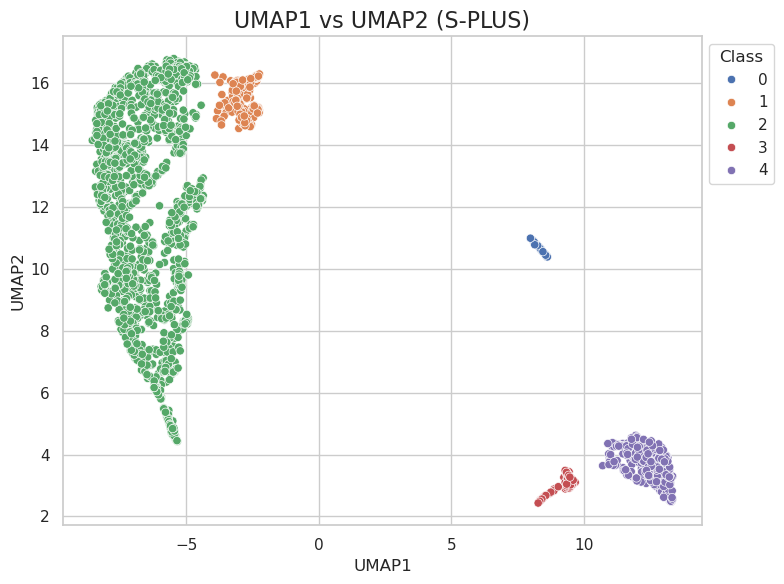

In [28]:
# Filtrar filas donde no haya valores -99 en las columnas relevantes
df_filtered = df_final[(merged_df_final_['UMAP1_SPLUS'] != -99) & 
                       (merged_df_final_['UMAP2_SPLUS'] != -99) & 
                       (merged_df_final_['Class_SPLUS'] != -99)]

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los puntos usando las columnas UMAP1 y UMAP2 para S-PLUS
sns.scatterplot(x='UMAP1_SPLUS', y='UMAP2_SPLUS', hue='Class_SPLUS', palette='deep', data=df_filtered, legend='full')

# Títulos y etiquetas
plt.title('UMAP1 vs UMAP2 (S-PLUS)', fontsize=16)
plt.xlabel('UMAP1', fontsize=12)
plt.ylabel('UMAP2', fontsize=12)

# Mostrar leyenda
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

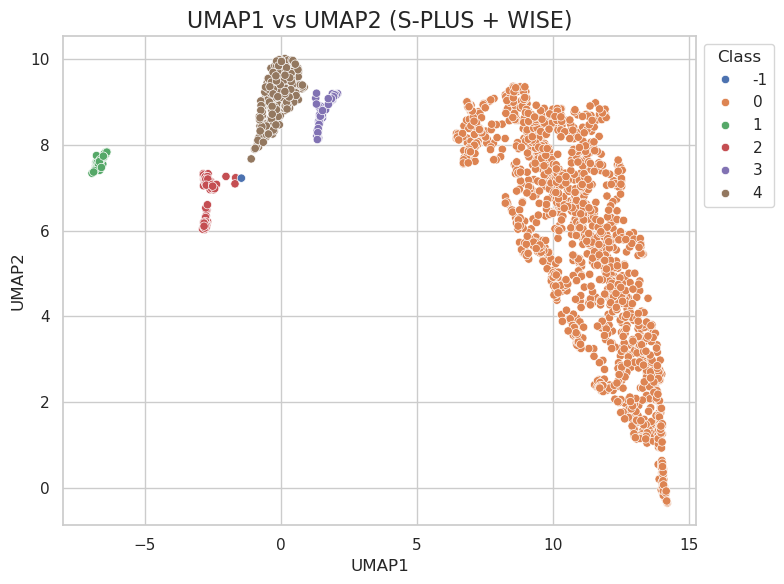

In [29]:

# Filtrar filas donde no haya valores -99 en las columnas relevantes para S-PLUS + WISE
df_filtered_wise = df_final[(merged_df_final_['UMAP1_SPLUS_WISE'] != -99) & 
                            (merged_df_final_['UMAP2_SPLUS_WISE'] != -99) & 
                            (merged_df_final_['Class_SPLUS_WISE'] != -99) & 
                            (merged_df_final_['W1mag'] != -99) & 
                            (merged_df_final_['W2mag'] != -99)]

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los puntos usando las columnas UMAP1 y UMAP2 para S-PLUS + WISE
sns.scatterplot(x='UMAP1_SPLUS_WISE', y='UMAP2_SPLUS_WISE', hue='Class_SPLUS_WISE', palette='deep', data=df_filtered_wise, legend='full')

# Títulos y etiquetas
plt.title('UMAP1 vs UMAP2 (S-PLUS + WISE)', fontsize=16)
plt.xlabel('UMAP1', fontsize=12)
plt.ylabel('UMAP2', fontsize=12)

# Mostrar leyenda
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [30]:
mask = df_final['SimbadType'] != "UNKNOWN"
df_final_simbad = df_final[mask]
df_final_simbad

,ID,RAJ2000,DEJ2000,rmag,e_rmag,gmag,e_gmag,imag,e_imag,umag,...,W2mag,e_W1mag,e_W2mag,SimbadType,Class_SPLUS,UMAP1_SPLUS,UMAP2_SPLUS,Class_SPLUS_WISE,UMAP1_SPLUS_WISE,UMAP2_SPLUS_WISE
0,iDR4_3_HYDRA-0011_0001534,151.228065,-24.565881,15.220734,0.002704,16.171457,0.004697,14.812934,0.002310,18.507275,...,12.724,0.025,0.026,EB*,2,-5.442610,7.757478,0,12.202629,2.276409
1,iDR4_3_HYDRA-0021_0019499,151.820602,-25.619486,13.060103,0.000955,13.233669,0.001089,13.076601,0.001002,14.610666,...,12.008,0.023,0.023,EB*,1,-2.864902,15.890389,0,7.046351,8.736568
2,iDR4_3_HYDRA-0023_0021195,154.612704,-25.530006,14.198063,0.001602,14.808924,0.002449,14.000414,0.001494,16.387249,...,12.400,0.023,0.023,EB*_Candidate,2,-6.490024,10.687394,0,11.147096,4.682925
3,iDR4_3_HYDRA-0026_0046098,158.459389,-24.620632,14.722768,0.002233,15.341463,0.003469,14.474484,0.002015,17.200853,...,12.822,0.025,0.028,EB*,2,-6.868538,9.669092,0,12.216504,4.232417
5,iDR4_3_HYDRA-0033_0017375,154.580768,-27.094394,13.543561,0.000864,14.003381,0.001256,13.419039,0.000814,15.431086,...,11.993,0.022,0.022,EB*,2,-7.766274,15.015370,0,9.315116,6.895871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,iDR4_3_STRIPE82-0142_0014029,339.139727,0.448016,19.183268,0.029700,19.569181,0.038745,19.162075,0.038881,19.583511,...,14.273,0.057,0.056,QSO,4,13.036900,3.766674,4,-0.191933,9.604373
3626,iDR4_3_STRIPE82-0145_0038826,341.416423,-0.405451,18.928234,0.016211,19.286700,0.019883,18.811878,0.017894,23.062855,...,15.113,0.048,0.098,QSO,-99,-99.000000,-99.000000,-99,-99.000000,-99.000000
3627,iDR4_3_STRIPE82-0147_0003349,343.495206,-1.289140,18.887234,0.016449,19.338186,0.021200,18.768139,0.021792,19.316458,...,14.582,0.066,0.076,QSO,4,11.649218,4.006531,4,-0.192143,8.461503
3629,iDR4_3_STRIPE82-0151_0033785,346.434130,-0.425545,18.843254,0.020703,19.378155,0.027846,18.858511,0.024815,20.356724,...,13.910,0.044,0.040,QSO,2,-5.515374,15.548613,4,-0.770747,8.319734


## Disk 

In [31]:
df_disk_splus = pd.read_csv("../Ha-emitters-disk-iteractive/Halpha-disk_splus_Mine_PerField_total-unique.csv")    
df_disk_splus_simbad = pd.read_csv("../Ha-emitters-disk-iteractive/Halpha-disk_splus_Mine_PerField_total-unique_simbad.csv", usecols=["ALPHA", "DELTA"] + colum_simbad)  

In [32]:
df_disk_splus

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,fwhm_r,fwhm_psf_r,ellog_r,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r
0,37084,101.578528,-10.185124,20.227420,0.247956,18.623507,0.046676,17.752325,0.018625,17.395954,...,2.601682,1.45,1.043430,0.041623,0.977219,0.000058,1.526968,38,19.015120,3.5
1,39118,102.143591,-10.160702,20.274828,0.265458,18.964895,0.060938,17.582357,0.016515,16.942923,...,2.442628,1.45,1.053800,0.051053,0.982051,-0.000998,1.533077,42,18.825540,3.5
2,44161,101.677934,-10.103680,99.000000,99.000000,19.272825,0.082695,18.108114,0.024534,17.850592,...,3.104729,1.45,1.046074,0.044044,0.961149,0.007979,1.582724,34,19.524807,3.5
3,74820,101.841699,-9.754105,99.000000,99.000000,19.232292,0.079711,18.359580,0.029696,17.947860,...,3.019709,1.45,1.092259,0.084466,0.979063,-0.003627,1.513626,30,19.660357,3.5
4,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,2.106400,1.12,1.102869,0.093274,0.966052,0.000036,1.256337,28,19.002687,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,59540,134.262381,-58.181402,17.112000,0.018062,14.364388,0.002878,13.127157,0.000947,12.624421,...,3.018704,1.68,1.049690,0.047338,0.998411,0.001047,1.784570,292,14.597100,3.5
3315,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,3.440888,1.68,1.217726,0.178797,0.975997,0.006430,1.986067,104,17.115864,3.5
3316,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,3.993102,1.68,1.214857,0.176858,0.980847,0.005627,2.224852,339,14.767982,3.5
3317,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,2.812770,1.58,1.190922,0.160315,0.986584,0.000839,1.751665,198,15.917403,3.5


In [33]:
len(df_disk_splus_simbad)

532

In [34]:
for columns in df_disk_splus.columns:
    print(columns)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r


In [35]:
# Crear ID combinando 'field' y 'NUMBER'
df_disk_splus["ID"] = "GDS_" + df_disk_splus["field"] + "_" + df_disk_splus["NUMBER"].astype(str)

In [36]:
# Verificar unicidad
assert df_disk_splus["ID"].duplicated().sum() == 0, "¡Hay IDs duplicados!"

In [37]:
df_disk_splus

,NUMBER,ALPHA,DELTA,u,uerr,g,gerr,r,rerr,i,...,fwhm_psf_r,ellog_r,ellip_r,class_r,spread_r,flux_radius_r,area_r,mumax_r,kron_radius_r,ID
0,37084,101.578528,-10.185124,20.227420,0.247956,18.623507,0.046676,17.752325,0.018625,17.395954,...,1.45,1.043430,0.041623,0.977219,0.000058,1.526968,38,19.015120,3.5,GDS_d020_37084
1,39118,102.143591,-10.160702,20.274828,0.265458,18.964895,0.060938,17.582357,0.016515,16.942923,...,1.45,1.053800,0.051053,0.982051,-0.000998,1.533077,42,18.825540,3.5,GDS_d020_39118
2,44161,101.677934,-10.103680,99.000000,99.000000,19.272825,0.082695,18.108114,0.024534,17.850592,...,1.45,1.046074,0.044044,0.961149,0.007979,1.582724,34,19.524807,3.5,GDS_d020_44161
3,74820,101.841699,-9.754105,99.000000,99.000000,19.232292,0.079711,18.359580,0.029696,17.947860,...,1.45,1.092259,0.084466,0.979063,-0.003627,1.513626,30,19.660357,3.5,GDS_d020_74820
4,8710,106.200785,-10.505256,19.037668,0.043265,19.354897,0.045797,18.230957,0.014984,17.535788,...,1.12,1.102869,0.093274,0.966052,0.000036,1.256337,28,19.002687,3.5,GDS_d023_8710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,59540,134.262381,-58.181402,17.112000,0.018062,14.364388,0.002878,13.127157,0.000947,12.624421,...,1.68,1.049690,0.047338,0.998411,0.001047,1.784570,292,14.597100,3.5,GDS_d517_59540
3315,79661,132.966284,-58.011465,17.345404,0.021169,15.853651,0.007164,15.637974,0.003772,15.490205,...,1.68,1.217726,0.178797,0.975997,0.006430,1.986067,104,17.115864,3.5,GDS_d517_79661
3316,143006,133.407799,-57.484707,17.032099,0.016677,14.210147,0.002624,13.011990,0.000888,12.548910,...,1.68,1.214857,0.176858,0.980847,0.005627,2.224852,339,14.767982,3.5,GDS_d517_143006
3317,36408,132.131348,-59.674270,16.222795,0.007555,15.189921,0.003210,14.515806,0.001831,14.210329,...,1.58,1.190922,0.160315,0.986584,0.000839,1.751665,198,15.917403,3.5,GDS_d522_36408


In [38]:
for columns in df_disk_splus.columns:
    print(columns)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r
ID


In [39]:
# Combinar los datos por RA y DEC (left join)
merged_df_disk = pd.merge(
    df_disk_splus,
    df_disk_splus_simbad, 
    on=["ALPHA", "DELTA"],
    how="left"
)

In [40]:
merged_df_disk["main_type"] = merged_df_disk["main_type"].fillna("UNKNOWN")
len(merged_df_disk)

3319

In [41]:
for columns in merged_df_disk.columns:
    print(columns)

NUMBER
ALPHA
DELTA
u
uerr
g
gerr
r
rerr
i
ierr
z
zerr
F378
F378err
F395
F395err
F410
F410err
F430
F430err
F515
F515err
F660
F660err
F861
F861err
flags_i
fwhm_i
fwhm_psf_i
ellog_i
ellip_i
class_i
spread_i
flux_radius_i
area_i
mumax_i
mag_aper2_i
magerr_apper2_i
mag_aper4_i
magerr_apper4_i
mag_aper6_i
magerr_apper6_i
flux_aper6_u
fluxerr_aper6_u
flux_aper6_g
fluxerr_aper6_g
flux_aper6_r
fluxerr_aper6_r
flux_aper6_i
fluxerr_aper6_i
flux_aper6_z
fluxerr_aper6_z
flux_aper6_F378
fluxerr_aper6_F378
flux_aper6_F395
fluxerr_aper6_F395
flux_aper6_F410
fluxerr_aper6_F410
flux_aper6_F430
fluxerr_aper6_F430
flux_aper6_F515
fluxerr_aper6_F515
flux_aper6_F660
fluxerr_aper6_F660
flux_aper6_F861
fluxerr_aper6_F861
x
y
field
a_image
b_image
theta_image
kron_radius_i
flags_r
fwhm_r
fwhm_psf_r
ellog_r
ellip_r
class_r
spread_r
flux_radius_r
area_r
mumax_r
kron_radius_r
ID
main_type


In [42]:
# Renombrar columnas clave para CDS/Vizier
# Suponiendo que tu DataFrame se llama df_gds
# ----------------------------------------------------------
# 1. Renombrar columnas para coincidir con el formato del MS
# ----------------------------------------------------------
rename_dict = {
    'u': 'umag',
    'uerr': 'e_umag',
    'F378': 'J0378mag',
    'F378err': 'e_J0378mag',
    'F395': 'J0395mag',
    'F395err': 'e_J0395mag',
    'F410': 'J0410mag',
    'F410err': 'e_J0410mag',
    'F430': 'J0430mag',
    'F430err': 'e_J0430mag',
    'g': 'gmag',
    'gerr': 'e_gmag',
    'F515': 'J0515mag',
    'F515err': 'e_J0515mag',
    'r': 'rmag',
    'rerr': 'e_rmag',
    'F660': 'J0660mag',
    'F660err': 'e_J0660mag',
    'i': 'imag',
    'ierr': 'e_imag',
    'F861': 'J0861mag',
    'F861err': 'e_J0861mag',
    'z': 'zmag',
    'zerr': 'e_zmag',
    'main_type': 'SimbadType',
    'ALPHA': 'RAJ2000',  # CDS/Vizier usa RAJ2000/DEJ2000
    'DELTA': 'DEJ2000'
}
df_gds = merged_df_disk.rename(columns=rename_dict)

In [43]:
# ----------------------------------------------------------
# 2. Ordenar columnas según el MS (mismo orden exacto)
# ----------------------------------------------------------
column_order = [
    "ID", 
    "RAJ2000", 
    "DEJ2000",
    "umag", "e_umag",
    "J0378mag", "e_J0378mag",
    "J0395mag", "e_J0395mag",
    "J0410mag", "e_J0410mag",
    "gmag", "e_gmag",
    "J0430mag", "e_J0430mag",
    "J0515mag", "e_J0515mag",
    "rmag", "e_rmag",
    "J0660mag", "e_J0660mag",
    "imag", "e_imag",
    "J0861mag", "e_J0861mag",
    "zmag", "e_zmag",
    # Añadir aquí otras columnas no fotométricas (Flags, FWHM, etc.) si existen
    "SimbadType"
]

In [44]:
# Seleccionar solo las columnas presentes en el DataFrame
final_columns = [col for col in column_order if col in df_gds.columns]
merged_df_disk_final = df_gds[final_columns]
merged_df_disk_final

,ID,RAJ2000,DEJ2000,umag,e_umag,J0378mag,e_J0378mag,J0395mag,e_J0395mag,J0410mag,...,e_rmag,J0660mag,e_J0660mag,imag,e_imag,J0861mag,e_J0861mag,zmag,e_zmag,SimbadType
0,GDS_d020_37084,101.578528,-10.185124,20.227420,0.247956,20.596730,0.477397,20.064114,0.432295,19.183353,...,0.018625,17.427435,0.016614,17.395954,0.013606,17.254793,0.021798,17.212942,0.015066,UNKNOWN
1,GDS_d020_39118,102.143591,-10.160702,20.274828,0.265458,99.000000,99.000000,99.000000,99.000000,99.000000,...,0.016515,17.021748,0.012841,16.942923,0.010303,16.576881,0.014365,16.467571,0.009554,UNKNOWN
2,GDS_d020_44161,101.677934,-10.103680,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,0.024534,17.843397,0.021747,17.850592,0.018462,17.713781,0.029712,17.689983,0.020636,UNKNOWN
3,GDS_d020_74820,101.841699,-9.754105,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,19.367290,...,0.029696,17.817059,0.021855,17.947860,0.019803,17.790375,0.031069,17.702381,0.020698,UNKNOWN
4,GDS_d023_8710,106.200785,-10.505256,19.037668,0.043265,19.196240,0.073271,18.976310,0.095548,19.875435,...,0.014984,16.866560,0.007205,17.535788,0.010182,16.919794,0.011757,16.876080,0.008989,EB*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,GDS_d517_59540,134.262381,-58.181402,17.112000,0.018062,16.680643,0.019355,16.320915,0.022314,15.598781,...,0.000947,12.864580,0.000964,12.624421,0.000748,12.204414,0.001035,12.147956,0.000907,UNKNOWN
3315,GDS_d517_79661,132.966284,-58.011465,17.345404,0.021169,16.828485,0.021239,16.692500,0.029076,16.314852,...,0.003772,15.462837,0.003926,15.490205,0.003458,15.277567,0.005253,15.230705,0.003670,UNKNOWN
3316,GDS_d517_143006,133.407799,-57.484707,17.032099,0.016677,17.034304,0.024259,16.588572,0.026681,15.726208,...,0.000888,12.754676,0.000911,12.548910,0.000720,12.091901,0.000980,12.363142,0.000782,UNKNOWN
3317,GDS_d522_36408,132.131348,-59.674270,16.222795,0.007555,16.028465,0.009892,15.921395,0.013398,15.601741,...,0.001831,14.187616,0.001792,14.210329,0.001597,13.785573,0.002206,14.051021,0.001799,EB*


In [45]:
print(f"Columnas incluidas: {merged_df_disk_final.columns.tolist()}")

Columnas incluidas: ['ID', 'RAJ2000', 'DEJ2000', 'umag', 'e_umag', 'J0378mag', 'e_J0378mag', 'J0395mag', 'e_J0395mag', 'J0410mag', 'e_J0410mag', 'gmag', 'e_gmag', 'J0430mag', 'e_J0430mag', 'J0515mag', 'e_J0515mag', 'rmag', 'e_rmag', 'J0660mag', 'e_J0660mag', 'imag', 'e_imag', 'J0861mag', 'e_J0861mag', 'zmag', 'e_zmag', 'SimbadType']


In [46]:
# Guardar el catálogo en formato ASCII con separador de espacios
# Guardar el DataFrame en formato ASCII para CDS/Vizier
output_filename_disk = "../CDS_tables/hasgds.dat"

# Verifica si el DataFrame tiene la columna SimbadType como cadena
if 'SimbadType' in merged_df_disk_final.columns:
    merged_df_disk_final['SimbadType'] = merged_df_disk_final['SimbadType'].astype(str)


# Guardar el DataFrame en formato ASCII para CDS/Vizier
merged_df_disk_final.to_csv(
    output_filename_disk,
    sep=" ",                # Separador de columnas: espacio
    index=False,            # No incluir el índice
    header=True,            # Incluir cabecera (¡verificar formato!)
    na_rep="99.00000000",   # Representar NaN/missing como "99.00000000"
    encoding="ascii",       # Codificación ASCII estricta
    float_format="%.8f",    # 8 decimales (ajustar según requerimientos)
    quotechar='"',          # Carácter para cadenas (si hay espacios en texto)
    date_format="%Y-%m-%d"  # Formato de fechas (si aplica)
)

# Confirmación del guardado
print(f"DataFrame guardado correctamente en {output_filename}")



DataFrame guardado correctamente en ../CDS_tables/hasms.dat


/tmp/ipykernel_3221757/393425522.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_disk_final['SimbadType'] = merged_df_disk_final['SimbadType'].astype(str)


In [47]:
m = merged_df_disk_final["SimbadType"] =="EB*"
len(merged_df_disk_final[m])

118

/tmp/ipykernel_3221757/3154539228.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_disk_final['r-i'] = merged_df_disk_final['rmag'] - merged_df_disk_final['imag']
/tmp/ipykernel_3221757/3154539228.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_disk_final['r-J0660'] = merged_df_disk_final['rmag'] - merged_df_disk_final['J0660mag']
/tmp/ipykernel_3221757/3154539228.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with

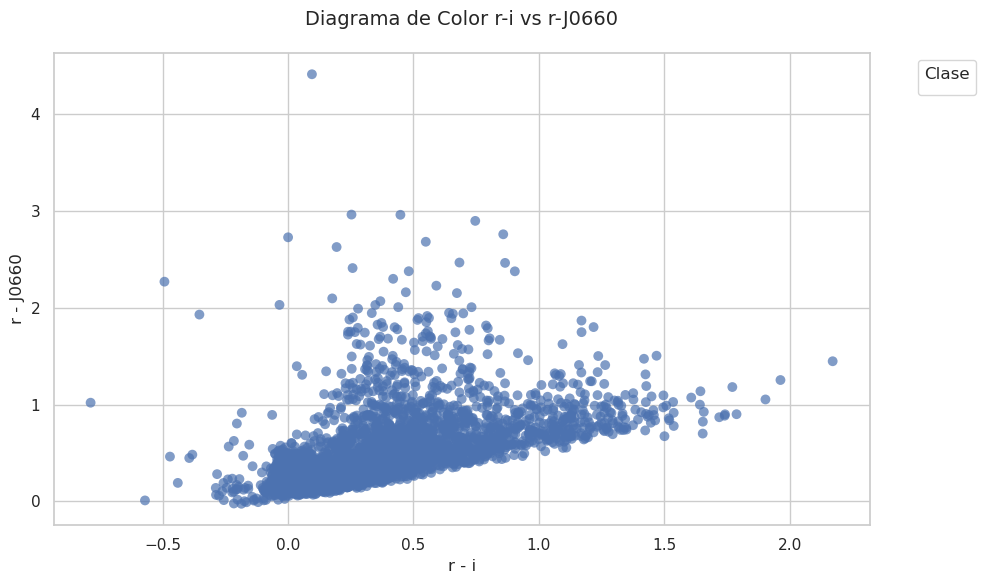

In [48]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(10, 6))  # Aumentar tamaño para mejor visualización

# Calcular las columnas necesarias
merged_df_disk_final['r-i'] = merged_df_disk_final['rmag'] - merged_df_disk_final['imag']
merged_df_disk_final['r-J0660'] = merged_df_disk_final['rmag'] - merged_df_disk_final['J0660mag']

# Graficar usando el parámetro data
sns.scatterplot(
    x='r-i', 
    y='r-J0660', 
    data=merged_df_disk_final,  # ¡Clave aquí!
    palette='viridis',  # Paleta más moderna (opcional)
    s=50,  # Tamaño de los puntos
    alpha=0.7,  # Transparencia para mejorar solapamientos
    edgecolor='none'  # Sin bordes en los puntos
)

# Títulos y etiquetas
plt.title('Diagrama de Color r-i vs r-J0660', fontsize=14, pad=20)
plt.xlabel('r - i', fontsize=12)
plt.ylabel('r - J0660', fontsize=12)

# Ajustar leyenda
plt.legend(
    title='Clase', 
    loc='upper left', 
    bbox_to_anchor=(1.05, 1),  # Mover más a la derecha
    frameon=True  # Borde para mejor legibilidad
)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()